In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
data = pd.DataFrame(data)

In [4]:
#資料前處理
data.drop(['No'],axis=1)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [5]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [6]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43819    False
43820    False
43821    False
43822    False
43823    False
Length: 43824, dtype: bool

In [7]:
np.where(data=='NaN')

(array([], dtype=int64), array([], dtype=int64))

In [8]:
np.isnan(data['pm2.5'])

0         True
1         True
2         True
3         True
4         True
         ...  
43819    False
43820    False
43821    False
43822    False
43823    False
Name: pm2.5, Length: 43824, dtype: bool

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [10]:
#EDA pm2.5
print(data.isnull().head(5)) 

      No   year  month    day   hour  pm2.5   DEWP   TEMP   PRES   cbwd  \
0  False  False  False  False  False   True  False  False  False  False   
1  False  False  False  False  False   True  False  False  False  False   
2  False  False  False  False  False   True  False  False  False  False   
3  False  False  False  False  False   True  False  False  False  False   
4  False  False  False  False  False   True  False  False  False  False   

     Iws     Is     Ir  
0  False  False  False  
1  False  False  False  
2  False  False  False  
3  False  False  False  
4  False  False  False  


In [12]:
for i in range(len(data['month'])):
    if len(str(data['month'][i]))==1:
           data.loc[i,('month')] = '0'+ str(data.loc[i,('month')])
    else:
        continue
for i in range(len(data['day'])):
    if len(str(data['day'][i]))==1:
           data.loc[i,('day')] = '0'+ str(data.loc[i,('day')])
    else:
        continue
for i in range(len(data['hour'])):
    if len(str(data['hour'][i]))==1:
           data.loc[i,('hour')] = '0'+ str(data.loc[i,('hour')])
    else:
        continue

In [13]:
#time = np.empty(shape = (43825,1))
time=[]
print(type(time))
for i in range(43824):
    time.append(str(data.iloc[i,1])+'-'+str(data.iloc[i,2])+'-'+str(data.iloc[i,3])+' '+str(data.iloc[i,4])+':00:00')


<class 'list'>


In [14]:
time = pd.DataFrame(time)
df = pd.concat([time,data],ignore_index=True,axis=1)
df1 =df
drop_list = [1,2,3,4,5]
df1 = df1.drop(drop_list,axis=1)
df1 = df1.rename(columns = {0:'date',6:'pm2.5',7:'Dew_Point',8:'TEMP',9:'PRES',10:'cbwd',11:'Iws',12:'Is',13:'Ir'})

In [113]:
from datetime import datetime as dt,timedelta
import time
#df1['new_date'] = pd.to_datetime(df1['date'],format='%y-%m-%d %H:%M:%S')
df1.info()
df1.date = pd.to_datetime(df1.date)
df1['new_date'] = df1.date.dt.strftime('%y-%m-%d %H:%M:%S')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       43824 non-null  datetime64[ns]
 1   pm2.5      43824 non-null  float64       
 2   Dew_Point  43824 non-null  int64         
 3   TEMP       43824 non-null  float64       
 4   PRES       43824 non-null  float64       
 5   cbwd       43824 non-null  object        
 6   Iws        43824 non-null  float64       
 7   Is         43824 non-null  int64         
 8   Ir         43824 non-null  int64         
 9   new_date   43824 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 3.3+ MB


In [114]:
df2 = df1
df2['pm2.5'] = df1['pm2.5'].fillna(0)

In [154]:
df2.date.dt.month

0         1
1         1
2         1
3         1
4         1
         ..
43819    12
43820    12
43821    12
43822    12
43823    12
Name: date, Length: 43824, dtype: int64

In [157]:
print(df2['pm2.5'].groupby(df2.date.dt.month).mean())

date
1     107.357527
2     125.327423
3      93.447849
4      79.175000
5      77.722581
6      91.285833
7      92.481183
8      71.760484
9      78.889722
10    115.837903
11    102.854167
12     93.475000
Name: pm2.5, dtype: float64


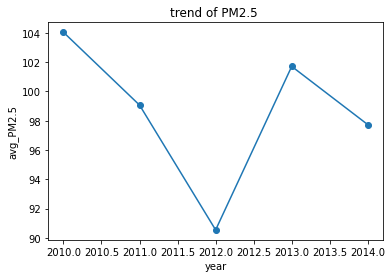

In [66]:
plt.plot(df1.date.dt.year.unique(),df1['pm2.5'].groupby([df1.date.dt.year]).mean(),color='tab:blue',marker='o',linestyle='solid')
plt.title('trend of avg_PM2.5 ')
plt.ylabel('avg_PM2.5')
plt.xlabel('year')
plt.show()

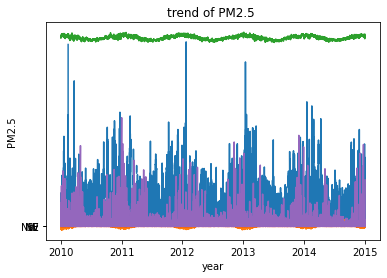

<Figure size 1e+06x80000 with 0 Axes>

In [84]:
#pm2.5的趨勢
plt.plot(df1.date,df1['pm2.5'],df1.date,df1['TEMP'],df1.date,df1['PRES'],df1.date,df1['cbwd'],df1.date,df1['Iws'])
plt.title('trend of PM2.5 ')
plt.ylabel('PM2.5')
plt.xlabel('year')
plt.figure(figsize=(1000,80),dpi=1000)
plt.show()

In [158]:
ts = df1.date
plt.plot(ts[::,2],df1['pm2.5'])
plt.title('trend of PM2.5 ')
plt.ylabel('PM2.5')
plt.xlabel('year')
plt.figure(figsize=(1000,80),dpi=1000)
plt.show()

ValueError: key of type tuple not found and not a MultiIndex

In [ ]:
df3=[]
for i in range(43824):
    df3.append(np.mean(df2[i:i+10]))
plt.plot(df1['date'],df3,color='tab:blue',marker='o',linestyle='solid')
plt.title('trend of PM2.5 ')
plt.ylabel('PM2.5')
plt.xlabel('time')
plt.show()

In [ ]:
len(str(data.loc[43222,('month')]))

In [ ]:
print('0'+ '%d' %(data['month'][0]))